In [2]:
import numpy as np
from datapoint import DataPoint as dp
from dataconfig import DataConfig as dc
import random
from random import uniform as rand
import math
from plotter import *
from utils import *

In [3]:
def gendata(config = dc()):
    xlim = config.xlim
    ylim = config.ylim
    radius_factor = config.radius_factor
    n = config.n
    m = config.m
    alpha = config.alpha
    
    rad = min(xlim, ylim)/radius_factor
    cen = []
    while len(cen) < m:
        cenx = rand(-xlim+rad, xlim-rad)
        ceny = rand(-ylim+rad, ylim-rad)
        possible = True
        for a in cen:
            temp = dist(cenx, ceny, a[0], a[1])
            if(temp <= (alpha+2)*rad):
                possible = False
                break
                
        if possible: cen.append((cenx, ceny))

    pts = []
    while len(pts) < n:
        idx = int(rand(0, m-1e-9))
        r = math.sqrt(rand(0, 1))*rad
        theta = rand(0, 2*math.pi-1e-9)
        pts.append(dp(cen[idx][0] + r*math.cos(theta), cen[idx][1] + r*math.sin(theta), idx))
        
    return pts

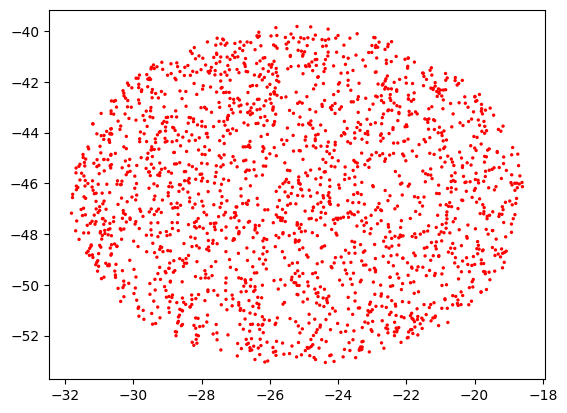

In [32]:
config = dc(alpha = 0, m = 1, n = 2000)
pts = sorted(gendata(config), key = lambda x: x.cluster)
save(pts, config)
for i in range(len(pts)): pts[i].cluster = -1
mplot(pts, 0, 0)